
  INISIALISASI DATA MAHASISWA
40 mahasiswa ditambahkan ke dalam graf

  KELOMPOK
42 koneksi pertemanan

  KLASTER PERTEMANAN

----------------------------------------------------------------------
  >> Asal Daerah
----------------------------------------------------------------------
Akamsi                        :  55 koneksi (11 anggota)
Jabodetabek                   :  10 koneksi ( 5 anggota)
Plat P                        :   1 koneksi ( 2 anggota)
Plat S                        :   1 koneksi ( 2 anggota)
Plat M                        :   1 koneksi ( 2 anggota)
Plat N                        :   1 koneksi ( 2 anggota)
Plat Ax                       :   6 koneksi ( 4 anggota)

----------------------------------------------------------------------
  >> Tempat Tinggal & Komunitas
----------------------------------------------------------------------
Sekos                         :   1 koneksi ( 2 anggota)

----------------------------------------------------------------------
  >> Organi

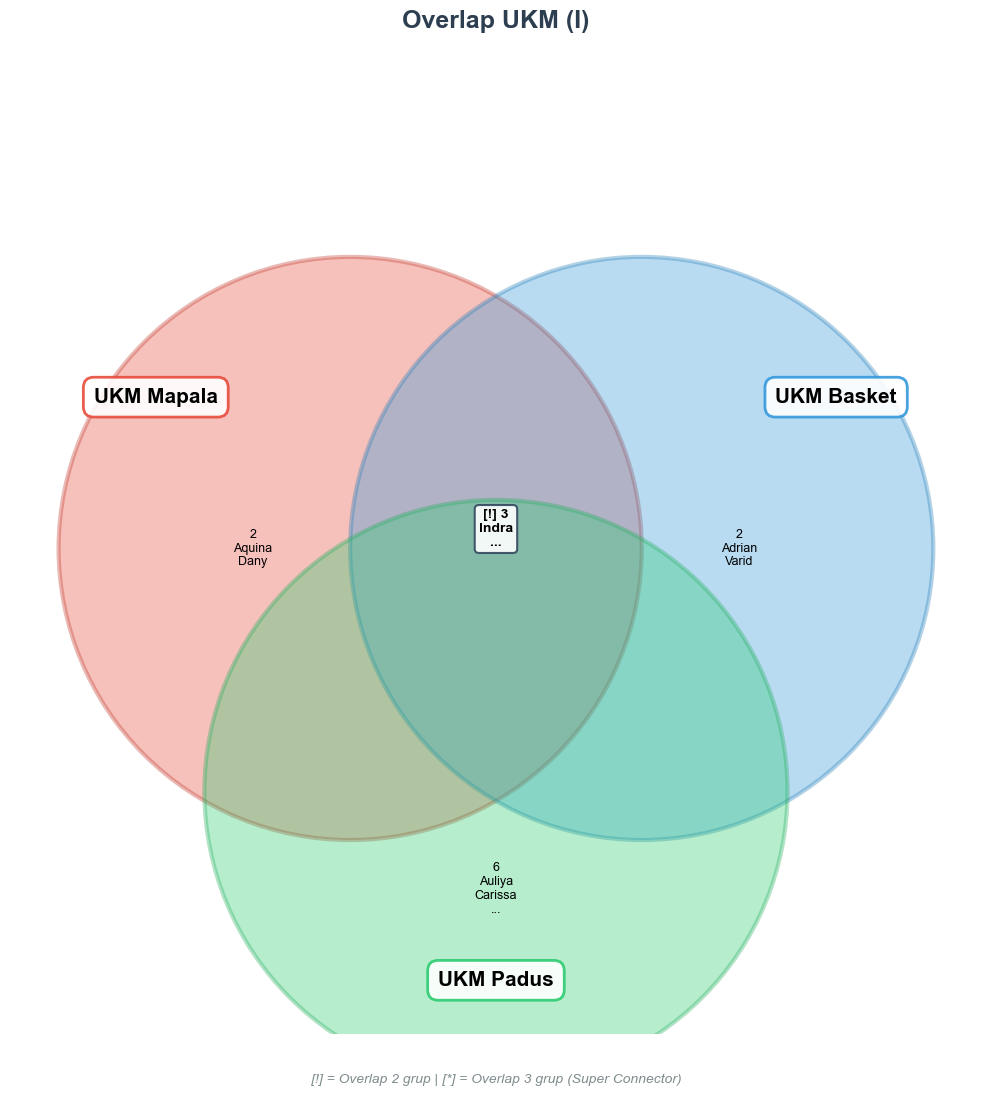

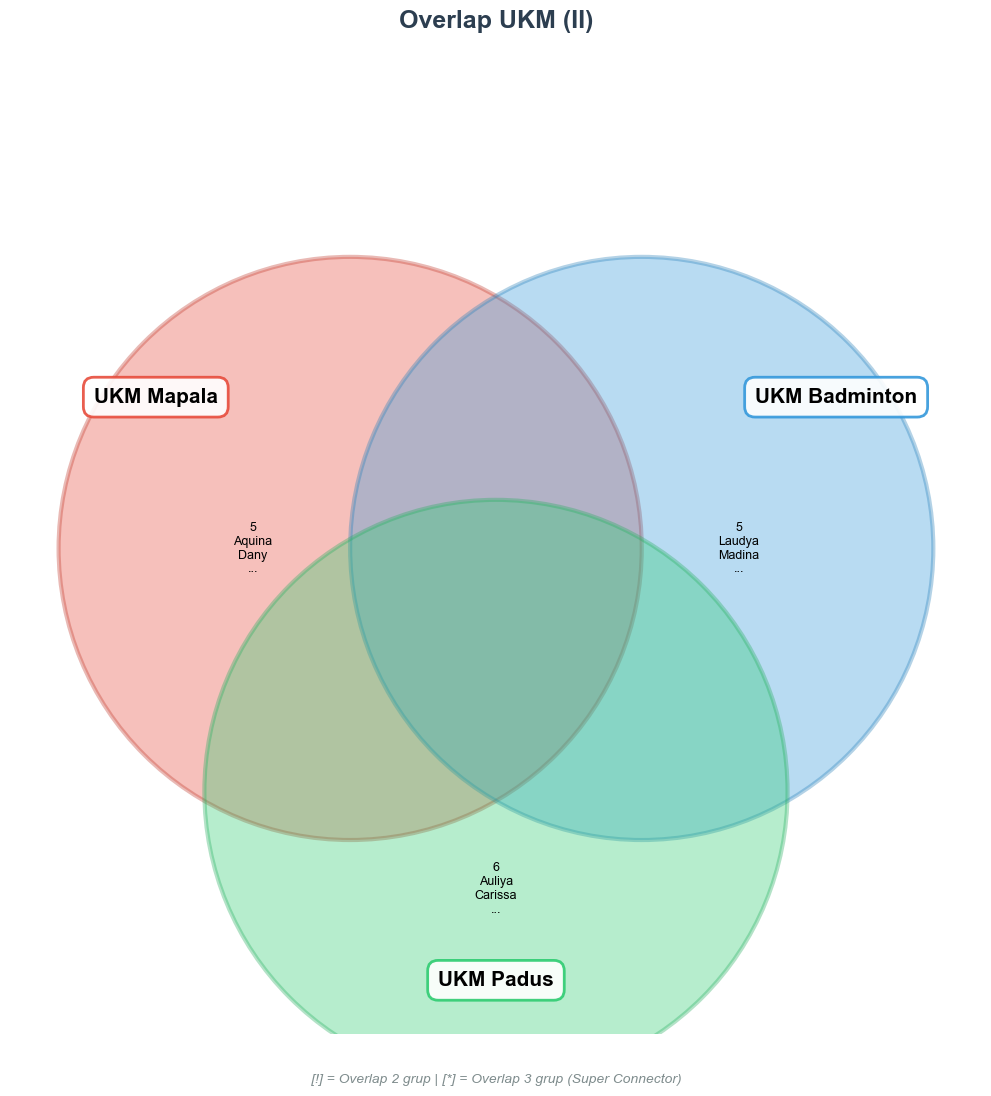

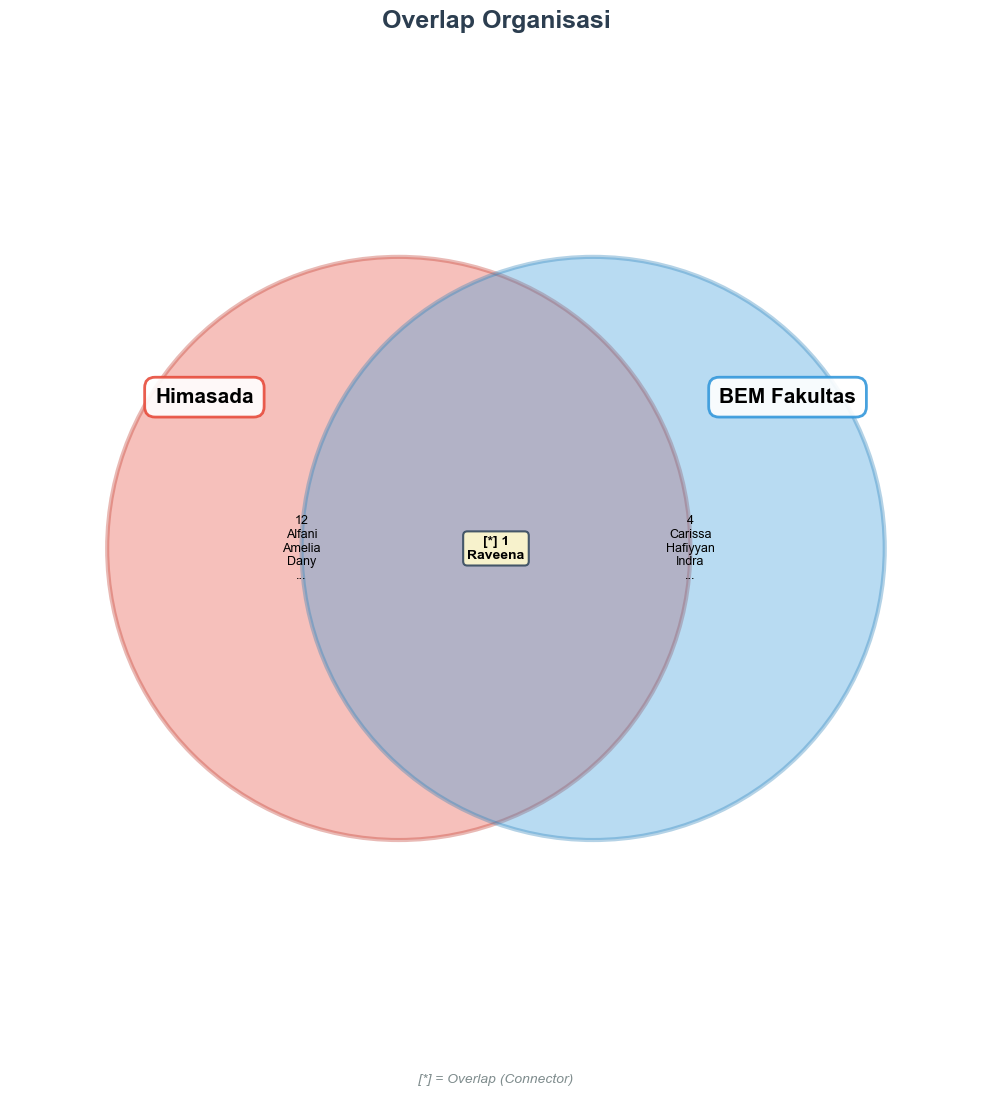

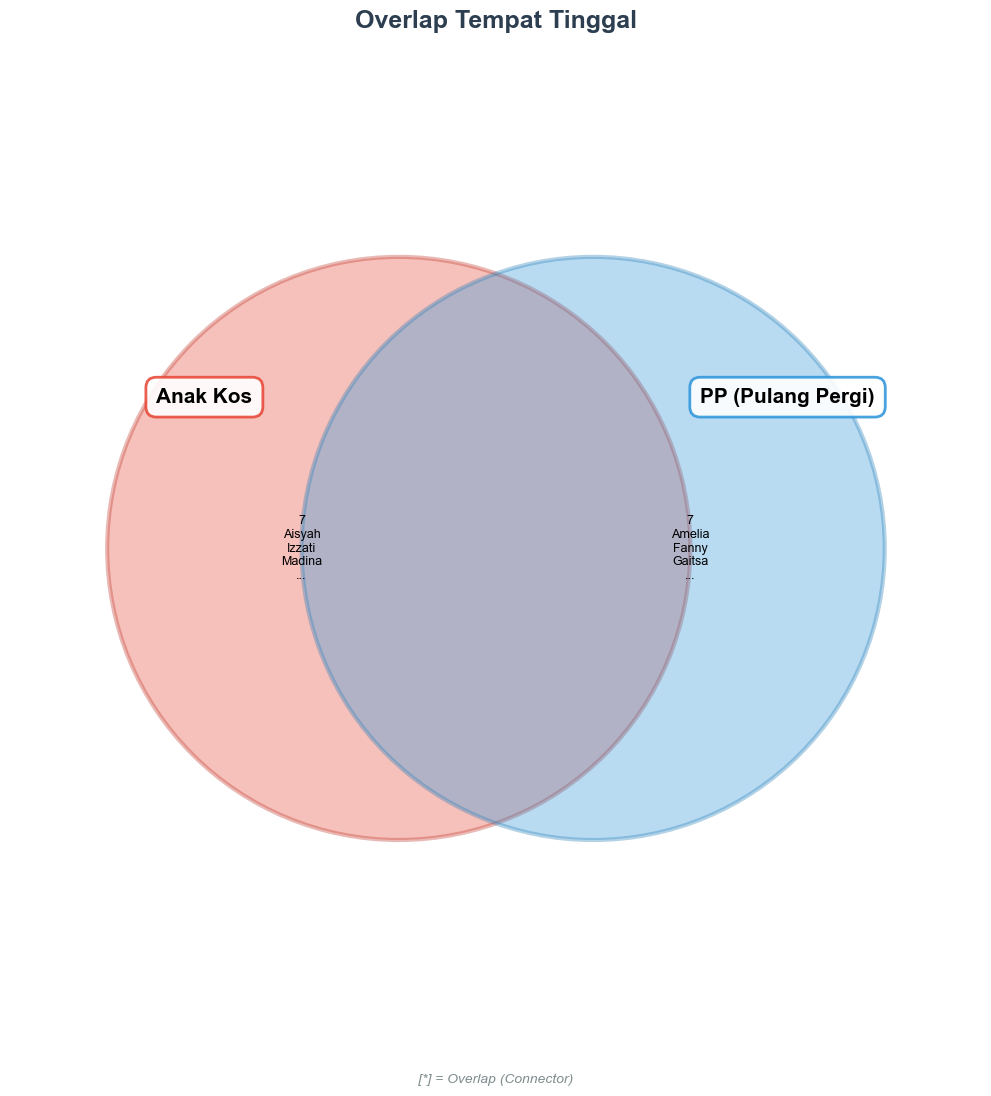


DETAIL KONEKSI SETIAP MAHASISWA:
Raveena: 25 koneksi
Amelia: 22 koneksi
Yuniar: 21 koneksi
Madina: 20 koneksi
Via: 20 koneksi
Wildan: 19 koneksi
Selvy: 19 koneksi
Maulida: 18 koneksi
Indra: 18 koneksi
Kiky: 18 koneksi
Izzati: 17 koneksi
Dany: 17 koneksi
Fanny: 16 koneksi
Naia: 16 koneksi
Kenzy: 16 koneksi
Carissa: 16 koneksi
Esthi: 16 koneksi
Adrian: 14 koneksi
Sofia: 14 koneksi
Maya: 13 koneksi
Varid: 13 koneksi
Maria: 12 koneksi
Aquina: 12 koneksi
Alfani: 12 koneksi
Alimun: 11 koneksi
Aisyah: 11 koneksi
Hafiyyan: 11 koneksi
Auliya: 10 koneksi
Diva: 10 koneksi
Erik: 10 koneksi
Gaitsa: 8 koneksi
Hizkia: 6 koneksi
Naufal: 5 koneksi
Laudya: 5 koneksi
Angel: 3 koneksi
Adinda: 2 koneksi
Ophyng: 2 koneksi
Febriani: 2 koneksi
Diah: 2 koneksi
Gendis: 2 koneksi

✓ Semua 40 mahasiswa sudah tercakup dalam jaringan!

  VISUALISASI JARINGAN PERTEMANAN

   Sedang membuat visualisasi graf...
   (Ini mungkin memerlukan waktu beberapa detik...)



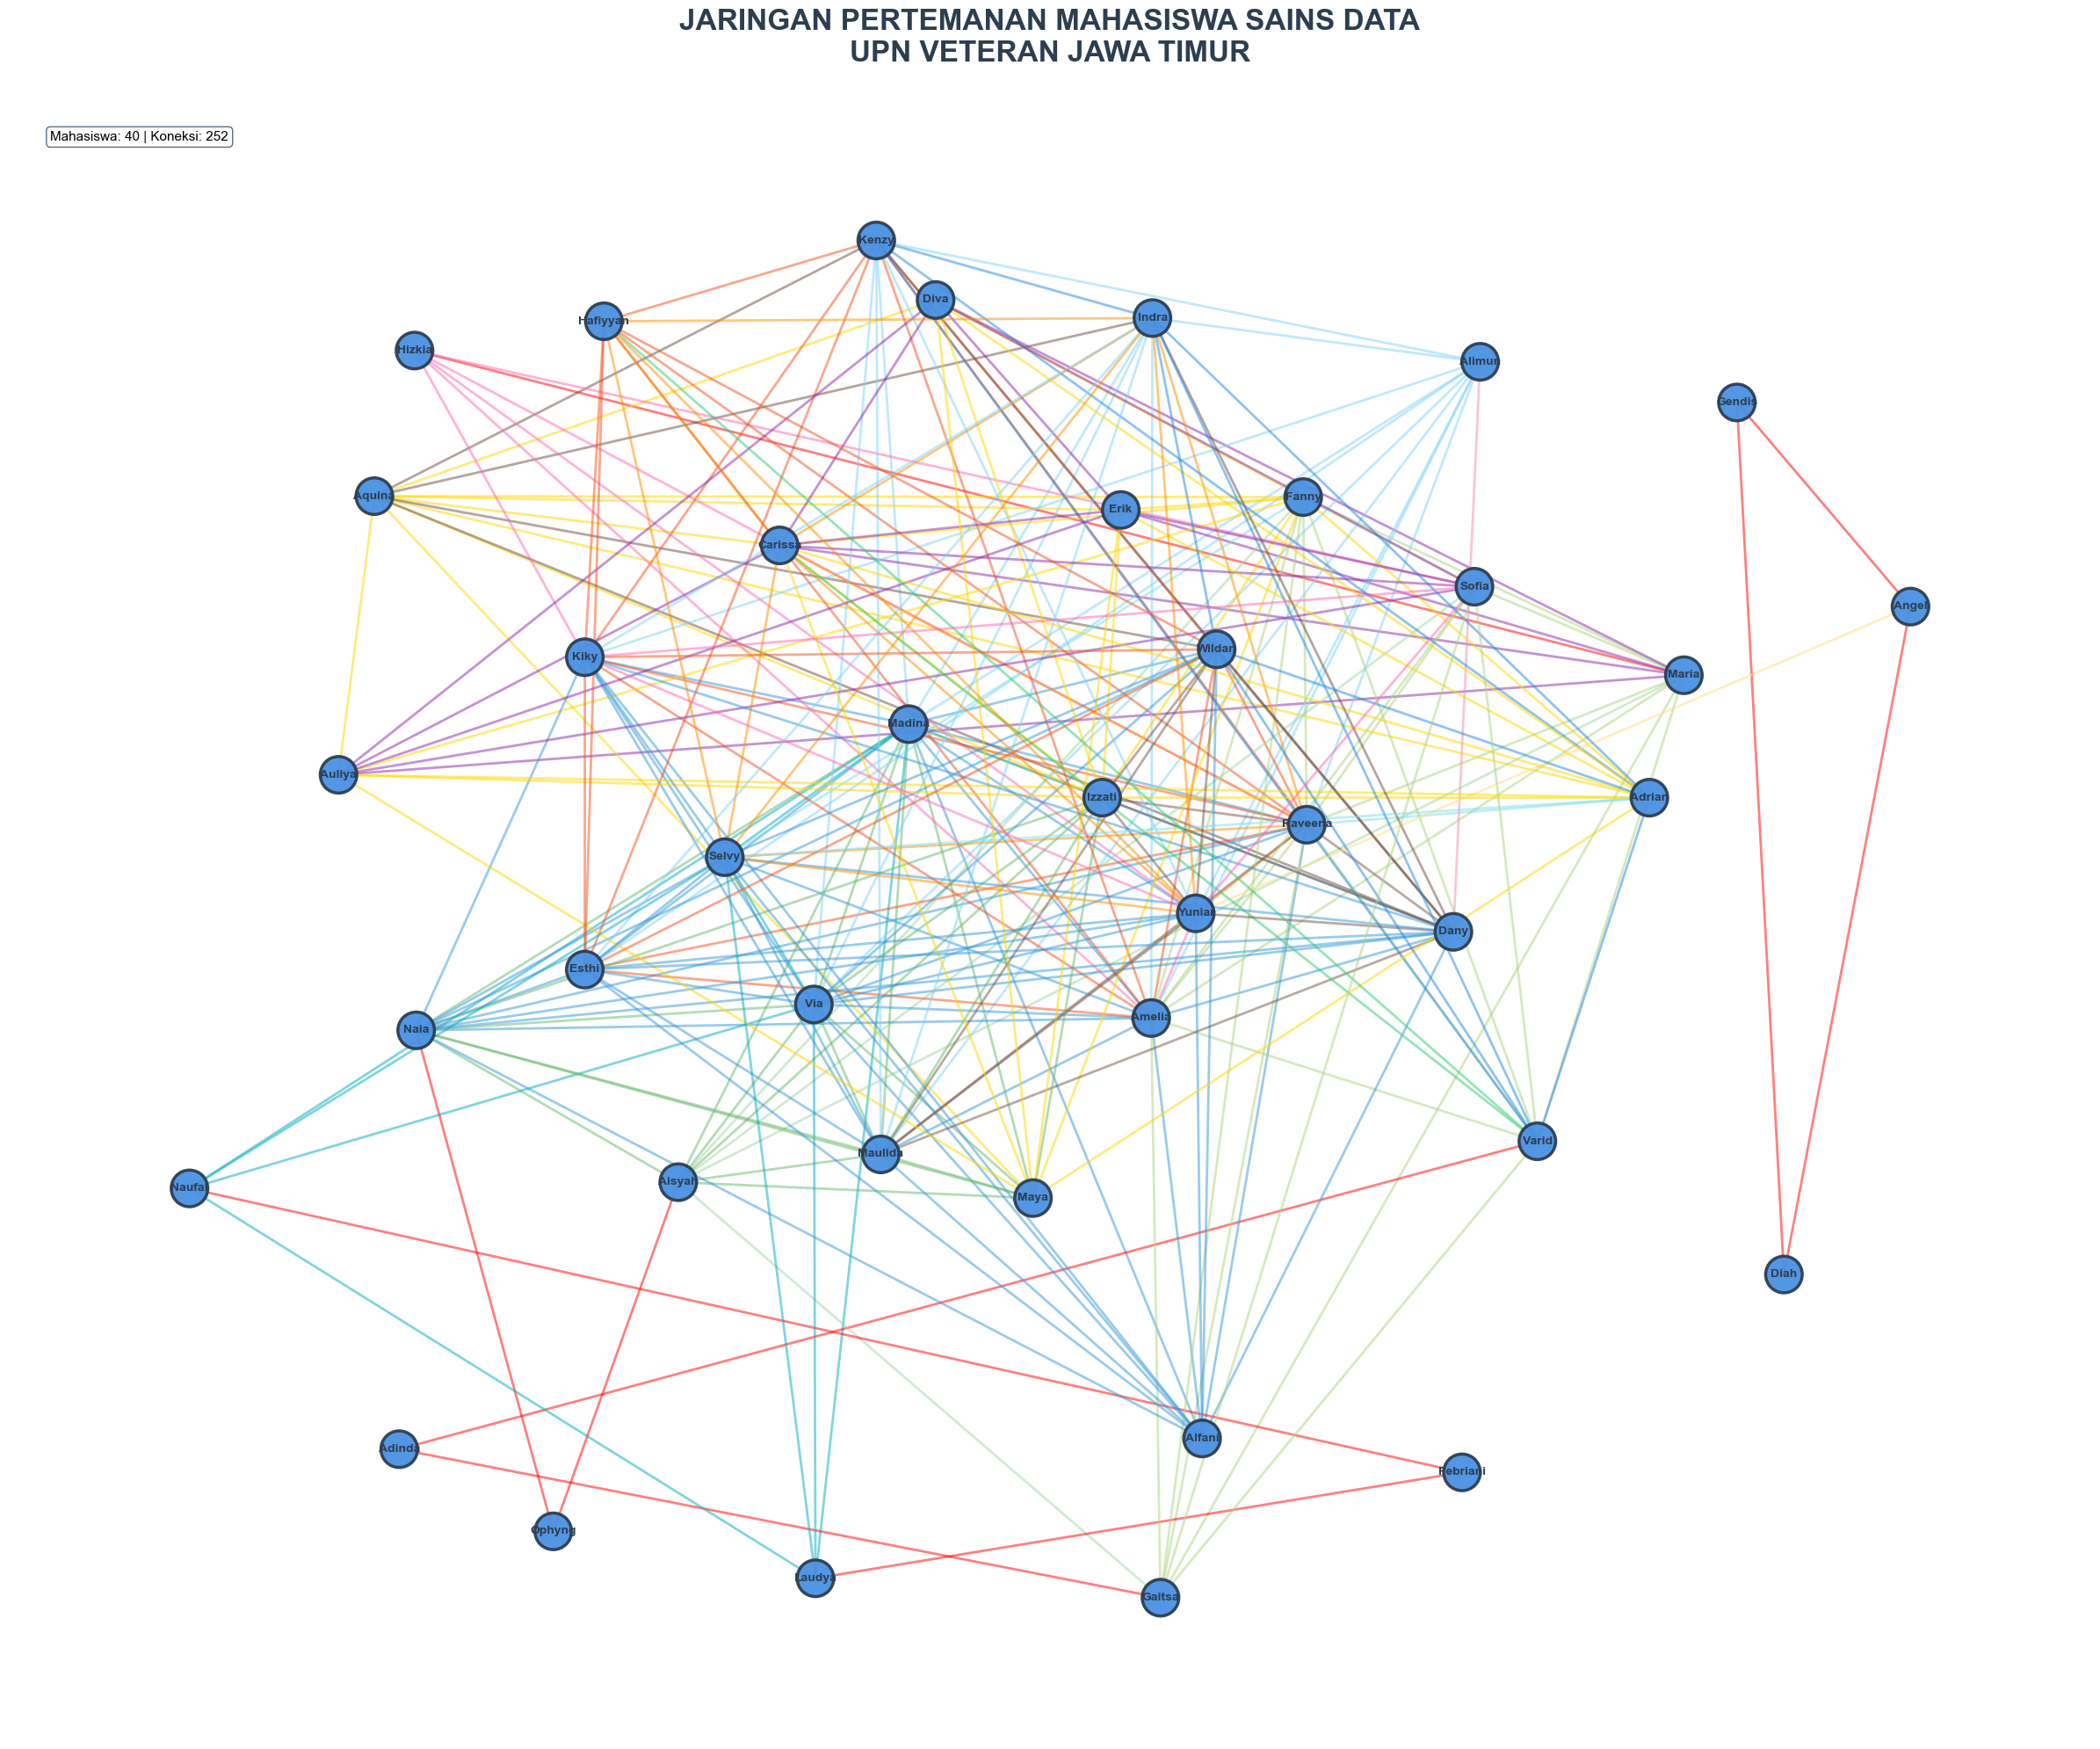


  ANALISIS SELESAI!


In [80]:
# -*- coding: utf-8 -*-
"""
==============================================================================
ANALISIS JARINGAN PERTEMANAN MAHASISWA SAINS DATA UPN VETERAN JATIM
==============================================================================
"""

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from matplotlib.patches import Circle
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi matplotlib untuk tampilan lebih cantik
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['figure.dpi'] = 100

# ========== INISIALISASI GRAPH ==========
G = nx.Graph()

# ========== FUNGSI UNTUK MEMBUAT KONEKSI PERTEMANAN SECARA ITERATIF ==========
def tambah_koneksi_klaster(graph, anggota_klaster, warna_edge, nama_klaster):
    """
    Fungsi untuk membuat koneksi pertemanan secara iteratif untuk anggota klaster.
    Setiap anggota dalam klaster akan terhubung dengan semua anggota lainnya (clique).
    
    Parameters:
    - graph: NetworkX graph object
    - anggota_klaster: list nama-nama anggota dalam klaster
    - warna_edge: warna untuk edge koneksi (string atau hex)
    - nama_klaster: nama klaster untuk logging
    
    Returns:
    - jumlah edges yang ditambahkan
    """
    if len(anggota_klaster) < 2:
        print(f"   [!] {nama_klaster}: Minimal 2 anggota diperlukan")
        return 0
    
    # Buat semua kombinasi pasangan dalam klaster (iteratif)
    edges_baru = list(combinations(anggota_klaster, 2))
    
    # Tambahkan edges dengan atribut warna dan nama klaster
    for edge in edges_baru:
        graph.add_edge(edge[0], edge[1], color=warna_edge, klaster=nama_klaster)
    
    print(f"{nama_klaster:30s}: {len(edges_baru):3d} koneksi ({len(anggota_klaster):2d} anggota)")
    return len(edges_baru)

# ========== FUNGSI VISUALISASI GRAPH ==========
def draw_graph(graph, layout='spring', figsize=(22, 18)):
    """Visualisasi graph dengan layout yang bagus"""
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.set_facecolor('#f8f9fa')
    
    # Layout positioning
    if layout == 'spring':
        pos = nx.spring_layout(graph, k=2, iterations=50, seed=42)
    elif layout == 'kamada':
        pos = nx.kamada_kawai_layout(graph)
    else:
        pos = nx.circular_layout(graph)

    # Ambil warna edges (dari atribut color)
    edge_colors = [graph[u][v].get('color', '#cccccc') for u, v in graph.edges()]
    
    # Ambil warna nodes (jika ada)
    node_colors = [graph.nodes[node].get('color', '#4A90E2') for node in graph.nodes()]
    
    # Gambar edges
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, width=2, alpha=0.5)
    
    # Gambar nodes
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=900,
                          alpha=0.95, edgecolors='#2c3e50', linewidths=2.5)
    
    # Gambar labels
    nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold', 
                           font_color='#2c3e50')

    # Title
    plt.title("JARINGAN PERTEMANAN MAHASISWA SAINS DATA\nUPN VETERAN JAWA TIMUR",
              fontsize=24, fontweight='bold', pad=30, color='#2c3e50')
    
    # Info statistik di pojok
    stats_text = f"Mahasiswa: {graph.number_of_nodes()} | Koneksi: {graph.number_of_edges()}"
    plt.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='#34495e'))
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ========== FUNGSI DIAGRAM VENN ==========
def draw_venn3_manual(set1, set2, set3, labels, title):
    """Buat & TAMPILKAN diagram Venn 3 sets dengan style modern"""
    fig, ax = plt.subplots(figsize=(13, 11))
    ax.set_facecolor('#f8f9fa')
    fig.patch.set_facecolor('#ffffff')

    # Hitung intersections
    only_1 = set1 - set2 - set3
    only_2 = set2 - set1 - set3
    only_3 = set3 - set1 - set2
    intersect_12 = (set1 & set2) - set3
    intersect_13 = (set1 & set3) - set2
    intersect_23 = (set2 & set3) - set1
    intersect_all = set1 & set2 & set3

    # Gambar circles dengan warna modern
    circle1 = Circle((0.35, 0.5), 0.3, alpha=0.35, color='#E74C3C', ec='#C0392B', lw=3)
    circle2 = Circle((0.65, 0.5), 0.3, alpha=0.35, color='#3498DB', ec='#2980B9', lw=3)
    circle3 = Circle((0.5, 0.25), 0.3, alpha=0.35, color='#2ECC71', ec='#27AE60', lw=3)
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)

    # Labels circles
    ax.text(0.15, 0.65, labels[0], fontsize=15, fontweight='bold', ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, 
                    edgecolor='#E74C3C', lw=2))
    ax.text(0.85, 0.65, labels[1], fontsize=15, fontweight='bold', ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, 
                    edgecolor='#3498DB', lw=2))
    ax.text(0.50, 0.05, labels[2], fontsize=15, fontweight='bold', ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, 
                    edgecolor='#2ECC71', lw=2))

    def format_names(name_set, max_names=2):
        names = sorted(name_set)
        return '\n'.join(names) if len(names) <= max_names else '\n'.join(names[:max_names]) + '\n...'

    def put(x, y, s, bold=False, highlight=False):
        bbox_props = dict(boxstyle='round,pad=0.3', 
                         facecolor='#fffacd' if highlight else 'white', 
                         alpha=0.9, edgecolor='#34495e' if bold else 'gray', 
                         lw=1.5 if bold else 1)
        ax.text(x, y, s, fontsize=9 if not bold else 10, ha='center', va='center',
                fontweight='bold' if bold else 'normal', 
                bbox=bbox_props if bold or highlight else None)

    # Tampilkan data
    if len(only_1) > 0: put(0.25, 0.50, f"{len(only_1)}\n{format_names(only_1)}")
    if len(only_2) > 0: put(0.75, 0.50, f"{len(only_2)}\n{format_names(only_2)}")
    if len(only_3) > 0: put(0.50, 0.15, f"{len(only_3)}\n{format_names(only_3)}")
    if len(intersect_12) > 0: put(0.50, 0.52, f"[!] {len(intersect_12)}\n{format_names(intersect_12,1)}", True)
    if len(intersect_13) > 0: put(0.38, 0.35, f"[!] {len(intersect_13)}\n{format_names(intersect_13,1)}", True)
    if len(intersect_23) > 0: put(0.62, 0.35, f"[!] {len(intersect_23)}\n{format_names(intersect_23,1)}", True)
    if len(intersect_all) > 0:
        put(0.50, 0.40, f"[*] {len(intersect_all)}\n{format_names(intersect_all,2)}", True, True)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"{title}", fontsize=18, fontweight='bold', pad=25, color='#2c3e50')
    
    # Legend
    legend_text = "[!] = Overlap 2 grup | [*] = Overlap 3 grup (Super Connector)"
    ax.text(0.5, -0.05, legend_text, ha='center', fontsize=10, 
           style='italic', color='#7f8c8d', transform=ax.transAxes)
    
    plt.tight_layout()
    plt.show()

def draw_venn2_manual(set1, set2, labels, title):
    """Buat & TAMPILKAN diagram Venn 2 sets dengan style modern"""
    fig, ax = plt.subplots(figsize=(13, 11))
    ax.set_facecolor('#f8f9fa')
    fig.patch.set_facecolor('#ffffff')

    # Hitung intersections
    only_1 = set1 - set2
    only_2 = set2 - set1
    intersect = set1 & set2

    # Gambar circles dengan warna modern
    circle1 = Circle((0.40, 0.5), 0.3, alpha=0.35, color='#E74C3C', ec='#C0392B', lw=3)
    circle2 = Circle((0.60, 0.5), 0.3, alpha=0.35, color='#3498DB', ec='#2980B9', lw=3)
    ax.add_patch(circle1)
    ax.add_patch(circle2)

    # Labels circles
    ax.text(0.20, 0.65, labels[0], fontsize=15, fontweight='bold', ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, 
                    edgecolor='#E74C3C', lw=2))
    ax.text(0.80, 0.65, labels[1], fontsize=15, fontweight='bold', ha='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, 
                    edgecolor='#3498DB', lw=2))

    def format_names(name_set, max_names=3):
        names = sorted(name_set)
        return '\n'.join(names) if len(names) <= max_names else '\n'.join(names[:max_names]) + '\n...'

    def put(x, y, s, bold=False, highlight=False):
        bbox_props = dict(boxstyle='round,pad=0.3', 
                         facecolor='#fffacd' if highlight else 'white', 
                         alpha=0.9, edgecolor='#34495e' if bold else 'gray', 
                         lw=1.5 if bold else 1)
        ax.text(x, y, s, fontsize=9 if not bold else 10, ha='center', va='center',
                fontweight='bold' if bold else 'normal', 
                bbox=bbox_props if bold or highlight else None)

    # Tampilkan data
    if len(only_1) > 0: put(0.30, 0.50, f"{len(only_1)}\n{format_names(only_1)}")
    if len(only_2) > 0: put(0.70, 0.50, f"{len(only_2)}\n{format_names(only_2)}")
    if len(intersect) > 0: put(0.50, 0.50, f"[*] {len(intersect)}\n{format_names(intersect, 3)}", True, True)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"{title}", fontsize=18, fontweight='bold', pad=25, color='#2c3e50')
    
    # Legend
    legend_text = "[*] = Overlap (Connector)"
    ax.text(0.5, -0.05, legend_text, ha='center', fontsize=10, 
           style='italic', color='#7f8c8d', transform=ax.transAxes)
    
    plt.tight_layout()
    plt.show()

# ========== FUNGSI UTILITY ==========
def print_header(text, style='double'):
    """Print header yang cantik"""
    line = "=" * 70 if style == 'double' else "-" * 70
    print(f"\n{line}")
    print(f"  {text}")
    print(f"{line}")

def print_subheader(text):
    """Print subheader"""
    print(f"\n{'-' * 70}")
    print(f"  >> {text}")
    print(f"{'-' * 70}")

# ========== DATA MAHASISWA ==========
print_header("INISIALISASI DATA MAHASISWA", 'double')

mahasiswa = [
    "Madina", "Maria", "Adinda", "Aquina", "Alimun", "Hizkia", "Raveena", 
    "Ophyng", "Aisyah", "Febriani", "Amelia", "Via", "Fanny", "Naia", 
    "Alfani", "Diah", "Kenzy", "Angel", "Maulida", "Izzati", "Auliya", 
    "Carissa", "Diva", "Erik", "Maya", "Dany", "Gendis", "Wildan", "Esthi", 
    "Naufal", "Laudya", "Adrian", "Selvy", "Hafiyyan", "Indra", "Yuniar", 
    "Kiky", "Sofia", "Varid", "Gaitsa"
]

G.add_nodes_from(mahasiswa)
print(f"{len(mahasiswa)} mahasiswa ditambahkan ke dalam graf")

# ========== KELOMPOK ==========
print_header("KELOMPOK")

sekelompok = [
    ("Raveena", "Amelia"), ("Raveena", "Yuniar"), ("Yuniar", "Amelia"),
    ("Hizkia", "Maria"), ("Hizkia", "Sofia"), ("Sofia", "Maria"),
    ("Naufal", "Laudya"), ("Naufal", "Febriani"), ("Febriani", "Laudya"),
    ("Kenzy", "Wildan"), ("Wildan", "Hafiyyan"), ("Kenzy", "Hafiyyan"),
    ("Alimun", "Dany"), ("Dany", "Indra"), ("Indra", "Alimun"),
    ("Esthi", "Kiky"), ("Kiky", "Selvy"), ("Selvy", "Esthi"),
    ("Adrian", "Izzati"), ("Izzati", "Fanny"), ("Fanny", "Adrian"),
    ("Aquina", "Diva"), ("Diva", "Maya"), ("Maya", "Aquina"),
    ("Diah", "Gendis"), ("Gendis", "Angel"), ("Angel", "Diah"),
    ("Ophyng", "Aisyah"), ("Aisyah", "Naia"), ("Naia", "Ophyng"),
    ("Adinda", "Varid"), ("Varid", "Gaitsa"), ("Gaitsa", "Adinda"),
    ("Auliya", "Carissa"), ("Carissa", "Erik"), ("Erik", "Auliya"),
    ("Madina", "Via"), ("Maulida", "Madina"), ("Via", "Alfani"), 
    ("Madina", "Alfani"), ("Maulida", "Via"), ("Maulida", "Alfani")        
]

G.add_edges_from(sekelompok, color='red')
print(f"{len(sekelompok)} koneksi pertemanan")

# ========== KLASTER ==========
print_header("KLASTER PERTEMANAN")

print_subheader("Asal Daerah")
akamsi = ["Yuniar", "Via", "Raveena", "Kenzy", "Esthi", "Alimun", "Amelia", 
          "Indra", "Madina", "Maulida", "Kiky"]
tambah_koneksi_klaster(G, akamsi, '#81D4FA', 'Akamsi')

jabodetabek = ["Sofia", "Maria", "Fanny", "Gaitsa", "Aisyah"]
tambah_koneksi_klaster(G, jabodetabek, '#A5D6A7', 'Jabodetabek')

platP = ["Angel", "Yuniar"]
tambah_koneksi_klaster(G, platP, '#FFE082', 'Plat P')

platS = ["Naia", "Izzati"]
tambah_koneksi_klaster(G, platS, '#FFAB91', 'Plat S')

platM = ["Dany", "Alimun"]
tambah_koneksi_klaster(G, platM, '#F48FB1', 'Plat M')

platN = ["Amelia", "Alfani"]
tambah_koneksi_klaster(G, platN, '#B0BEC5', 'Plat N')

platAx = ["Adrian", "Raveena", "Selvy", "Fanny"]
tambah_koneksi_klaster(G, platAx, '#80DEEA', 'Plat Ax')

print_subheader("Tempat Tinggal & Komunitas")
sekos = ["Aisyah", "Naia"]
tambah_koneksi_klaster(G, sekos, '#E1BEE7', 'Sekos')

print_subheader("Organisasi")
himasada = ["Dany", "Amelia", "Yuniar", "Kiky", "Esthi", "Raveena", "Naia", 
            "Wildan", "Selvy", "Via", "Madina", "Alfani", "Maulida"]
tambah_koneksi_klaster(G, himasada, '#3498DB', 'Himasada')

BEMfakultas = ["Indra", "Hafiyyan", "Varid", "Carissa", "Raveena"]
tambah_koneksi_klaster(G, BEMfakultas, '#2ECC71', 'BEM Fakultas')

print_subheader("Hobi & Interest")
warkopbening = ["Raveena", "Yuniar", "Wildan", "Dany", "Maulida", "Izzati"]
tambah_koneksi_klaster(G, warkopbening, '#795548', 'Warkop Bening')

skincaredanmakeup = ["Hizkia", "Kiky", "Yuniar", "Raveena", "Sofia", "Amelia"]
tambah_koneksi_klaster(G, skincaredanmakeup, '#FF69B4', 'Skincare & Makeup')

makanbareng = ["Fanny", "Adrian", "Izzati", "Carissa", "Auliya", "Erik", 
               "Aquina", "Diva", "Maya"]
tambah_koneksi_klaster(G, makanbareng, '#FFD700', 'Makan Bareng')

# ========== KLASTER TAMBAHAN ==========
print_header("KLASTER TAMBAHAN - KEHIDUPAN KAMPUS UPNVJT")

print_subheader("Unit Kegiatan Mahasiswa (UKM)")
ukm_mapala = ["Indra", "Wildan", "Kenzy", "Dany", "Aquina"]
ukm_padus = ["Maria", "Sofia", "Diva", "Auliya", "Carissa", "Erik"]
ukm_basket = ["Adrian", "Varid", "Indra", "Wildan", "Kenzy"]
# (UBAH DIKIT): Tambahkan UKM Badminton untuk menghubungkan komponen kecil
ukm_badminton = ["Naufal", "Laudya", "Via", "Madina", "Selvy"]

tambah_koneksi_klaster(G, ukm_mapala, '#6d4c41', 'UKM Mapala')
Tambah_mapala = 'done'
tambah_koneksi_klaster(G, ukm_padus, '#8e24aa', 'UKM Padus')
Tambah_padus = 'done'
tambah_koneksi_klaster(G, ukm_basket, '#1e88e5', 'UKM Basket')
Tambah_basket = 'done'
# penambahan kunci: UKM Badminton
tambah_koneksi_klaster(G, ukm_badminton, '#00acc1', 'UKM Badminton')
Tambah_badminton = 'done'

print_subheader("Kepanitiaan")
panitia_pkkmb = ["Raveena", "Yuniar", "Indra", "Hafiyyan", "Carissa", "Selvy"]
panitia_non_pkkmb = ["Raveena", "Hafiyyan", "Kiky", "Esthi", "Kenzy", "Wildan", "Amelia"]

tambah_koneksi_klaster(G, panitia_pkkmb, '#ff8f00', 'Panitia PKKMB')
tambah_koneksi_klaster(G, panitia_non_pkkmb, '#f4511e', 'Panitia Non PKKMB')

print_subheader("Tempat Tinggal (Expanded)")
tempat_kos = ["Aisyah", "Naia", "Izzati", "Maya", "Via", "Madina", "Maulida"]
PP = ["Raveena", "Amelia", "Fanny", "Maria", "Sofia", "Gaitsa", "Varid"]

tambah_koneksi_klaster(G, tempat_kos, '#66bb6a', 'Anak Kos')
tambah_koneksi_klaster(G, PP, '#aed581', 'PP (Pulang Pergi)')

# ========== INFORMASI DASAR GRAF ==========
print_header("INFORMASI DASAR GRAF")
print(f"""
   Total Mahasiswa (Nodes)    : {G.number_of_nodes()}
   Total Koneksi (Edges)      : {G.number_of_edges()}
   Rata-rata Koneksi          : {sum(dict(G.degree()).values())/len(mahasiswa):.2f}
   Graf Terhubung             : {'Ya' if nx.is_connected(G) else 'Tidak [!]'}
   Jumlah Komponen            : {nx.number_connected_components(G)}
""")

# ========== ANALISIS ==========
print_header("ANALISIS JARINGAN PERTEMANAN", 'double')

degree_dict = dict(G.degree())

# ========== 1) TOP 3 KONEKTIVITAS ==========
print_subheader("1. Top 3 Mahasiswa dengan Konektivitas Paling Banyak")

top_3 = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]

for rank, (nama, koneksi) in enumerate(top_3, 1):
    persentase = (koneksi / (len(mahasiswa) - 1)) * 100
    bar = "=" * int(koneksi / 5) + "-" * (20 - int(koneksi / 5))
    
    print(f"\n   Rank {rank}: {nama}")
    print(f"   - Jumlah Koneksi       : {koneksi}")
    print(f"   - Persentase           : {persentase:.1f}% dari {len(mahasiswa)-1} possible connections")
    print(f"   - Visualisasi          : {bar}")
    
    neighbors = list(G.neighbors(nama))
    print(f"   - Terhubung dengan     : {', '.join(sorted(neighbors)[:10])}" + 
          (f"... (+{len(neighbors)-10} lainnya)" if len(neighbors) > 10 else ""))

print(f"""
   [INSIGHT]
      - {top_3[0][0]} adalah mahasiswa paling terhubung dengan {top_3[0][1]} koneksi!
      - Mahasiswa dengan konektivitas tinggi adalah 'hub' dalam jaringan
      - Mereka ideal untuk:
        + Penyebaran informasi cepat (word of mouth)
        + Koordinator event/kampanye
        + Peer influencer untuk sosialisasi program
        + Ambassador atau representative kelompok
      - Strategi komunikasi: Libatkan mereka sebagai 'early adopters'
""")

# ========== 2) PASANGAN TERJAUH ==========
print_subheader("2. Pasangan-Pasangan dengan Koneksi Paling Jauh")

if nx.is_connected(G):
    diameter = nx.diameter(G)
    avg_path = nx.average_shortest_path_length(G)
    
    print(f"\n   Diameter Graf          : {diameter} hop")
    print(f"   Rata-rata Jarak        : {avg_path:.2f} hop")
    print(f"   Status                 : Semua mahasiswa terhubung!")
    
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    pasangan_terjauh = []
    
    for source in shortest_paths:
        for target, distance in shortest_paths[source].items():
            if distance == diameter and source < target:
                pasangan_terjauh.append((source, target, distance))
    
    print(f"\n   Jumlah pasangan dengan jarak maksimal: {len(pasangan_terjauh)} pasang")
    print(f"\n   Detail 8 pasangan terjauh:")
    
    for i, (orang1, orang2, jarak) in enumerate(pasangan_terjauh[:8], 1):
        jalur = nx.shortest_path(G, orang1, orang2)
        print(f"\n   {i}. {orang1} <-> {orang2}")
        print(f"      Jarak    : {jarak} hop")
        print(f"      Jalur    : {' -> '.join(jalur)}")
    
    if len(pasangan_terjauh) > 8:
        print(f"\n   ... dan {len(pasangan_terjauh) - 8} pasangan lainnya")
    
    if diameter <= 3:
        speed = "SANGAT CEPAT"
        desc = "Excellent! Informasi menyebar dalam 3 langkah atau kurang"
    elif diameter <= 5:
        speed = "CEPAT"
        desc = "Baik! Informasi dapat menjangkau semua orang dengan cukup cepat"
    else:
        speed = "MODERAT"
        desc = "Perlu waktu lebih lama untuk informasi menjangkau seluruh jaringan"
    
    print(f"""
   [INSIGHT]
      - Diameter {diameter} hop -> Penyebaran informasi: {speed}
      - {desc}
      - Rata-rata jarak {avg_path:.2f} hop artinya dua mahasiswa random
        berjarak sekitar {int(round(avg_path))} langkah pertemanan
      - Small World Effect: Graf ini menunjukkan karakteristik 'small world'
        dimana setiap orang terhubung melalui sedikit langkah
      - Implikasi praktis:
        + Penyebaran rumor/berita bisa sangat cepat
        + Koordinasi event lebih mudah
        + Network effect lebih kuat
""")
else:
    print("\n   [!] Graf tidak terhubung! Ada kelompok yang terisolasi.")
    components = list(nx.connected_components(G))
    print(f"   Jumlah komponen terpisah: {len(components)}")
    for i, comp in enumerate(components, 1):
        print(f"   Komponen {i}: {sorted(comp)}")

# ========== 3a) BRIDGE PERSON (BETWEENNESS CENTRALITY) ==========
print_subheader("3a. Bridge Person - Mahasiswa Penghubung Antar Kelompok")

betweenness = nx.betweenness_centrality(G)
top_bridge = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

print(f"\n   Top 10 Bridge Person (berdasarkan Betweenness Centrality):")
print(f"   {'Rank':<6} {'Nama':<12} {'Score':<12} {'Visualisasi':<30}")
print(f"   {'-'*65}")

for rank, (nama, score) in enumerate(top_bridge[:10], 1):
    bar = "=" * int(score * 100) + "-" * (25 - int(score * 100))
    if rank == 1:
        medal = "[1]"
    elif rank == 2:
        medal = "[2]"
    elif rank == 3:
        medal = "[3]"
    else:
        medal = "   "
    print(f"   {medal} {rank:<3} {nama:<12} {score:>8.4f}    {bar}")

print(f"""
   [INSIGHT]
      - {top_bridge[0][0]} adalah bridge person terkuat (score: {top_bridge[0][1]:.4f})
      - Bridge person = "jembatan" yang menghubungkan kelompok berbeda
      - Fungsi penting:
        + Information broker - kontrol aliran informasi antar grup
        + Mediator konflik antar kelompok
        + Koordinator kolaborasi lintas komunitas
        + Penghubung mahasiswa yang berbeda circles
      - Jika bridge person keluar/tidak aktif -> jaringan bisa terfragmentasi
      - Strategi: Pertahankan keterlibatan bridge person dalam organisasi
""")

# ========== 3b) BRIDGE PERSON DENGAN KONEKSI PALING SEDIKIT ==========
print_subheader("3b. Bridge Person dengan Koneksi Paling Sedikit")

bridge_with_degree = [(nama, betweenness[nama], degree_dict[nama]) 
                      for nama in G.nodes() if betweenness[nama] > 0]

# Sort berdasarkan koneksi paling sedikit (ascending) tapi tetap punya bridge score
bridge_low_degree = sorted(bridge_with_degree, key=lambda x: x[2])

print(f"\n   Top 10 Bridge Person dengan KONEKSI PALING SEDIKIT:")
print(f"   {'Rank':<6} {'Nama':<12} {'Koneksi':<10} {'Bridge Score':<14} {'Status'}")
print(f"   {'-'*70}")

# Hitung rata-rata degree
degrees = list(degree_dict.values())
avg_degree = np.mean(degrees)

# Tampilkan hanya yang koneksinya di bawah rata-rata
bridge_low_filtered = [item for item in bridge_low_degree if item[2] < avg_degree]

for rank, (nama, btw, deg) in enumerate(bridge_low_filtered[:10], 1):
    if rank == 1:
        medal = "[*]"
        status = "Paling Efisien"
    elif rank == 2:
        medal = "[+]"
        status = "Sangat Efisien"
    elif rank == 3:
        medal = "[-]"
        status = "Efisien"
    else:
        medal = "   "
        status = "Bridge Aktif"
    print(f"   {medal} {rank:<3} {nama:<12} {deg:<10} {btw:>10.4f}    {status}")

print(f"""
   [INSIGHT]
      - Menampilkan bridge person dengan koneksi < rata-rata ({avg_degree:.1f})
      - {bridge_low_filtered[0][0]} adalah bridge person dengan koneksi paling sedikit ({bridge_low_filtered[0][2]} koneksi)
        namun tetap berperan penting menghubungkan kelompok (bridge score: {bridge_low_filtered[0][1]:.4f})
      - Karakteristik "Strategic Connector":
        + Tidak banyak teman tapi posisinya KRUSIAL
        + Menghubungkan kelompok yang seharusnya tidak terhubung
        + "Hidden influencer" - tidak terlihat populer tapi sangat penting
      - Total {len(bridge_low_filtered)} mahasiswa adalah low-degree bridge person
      - Risiko: Jika mereka tidak aktif, jaringan bisa terfragmentasi
      - Strategi: Berikan perhatian khusus & support meski tidak "populer"
""")

# ========== Analisis Tambahan ==========
print_subheader("Analisis Tambahan")

# ========== 4) ANALISIS CLUSTERING COEFFICIENT ==========
print_subheader("4. Analisis Clustering - Tingkat Kekompakan Kelompok")

clustering_coeffs = nx.clustering(G)
avg_clustering = nx.average_clustering(G)

top_clustering = sorted(clustering_coeffs.items(), key=lambda x: x[1], reverse=True)[:10]

print(f"\n   Rata-rata Clustering Coefficient: {avg_clustering:.4f}")
print(f"\n   Top 10 Mahasiswa dengan Teman-Teman yang Saling Kenal:")
print(f"   {'Rank':<6} {'Nama':<12} {'Clustering':<12} {'Koneksi':<10} {'Interpretasi'}")
print(f"   {'-'*75}")

for rank, (nama, coef) in enumerate(top_clustering, 1):
    koneksi = degree_dict[nama]
    if coef > 0.7:
        desc = "Grup sangat kompak!"
    elif coef > 0.5:
        desc = "Grup cukup kompak"
    elif coef > 0.3:
        desc = "Grup moderat"
    else:
        desc = "Grup longgar"
    
    bar = "O" * int(coef * 15) + "o" * (15 - int(coef * 15))
    print(f"   {rank:<6} {nama:<12} {coef:>8.4f} {bar}   {koneksi:<10} {desc}")

print(f"""
   [INSIGHT]
      - Clustering coefficient mengukur seberapa kompak teman-teman seseorang
      - Score 1.0 = semua teman saling kenal (clique sempurna)
      - Score 0.0 = tidak ada teman yang saling kenal
      - Rata-rata {avg_clustering:.4f} menunjukkan jaringan dengan
        tingkat kekompakan {'tinggi (strong community)' if avg_clustering > 0.5 else 'moderat (diverse network)'}
      - Mahasiswa dengan clustering tinggi = inti dari kelompok kecil yang solid
      - Mahasiswa dengan clustering rendah = connector antar kelompok berbeda
""")

# ========== 5) DETEKSI KOMUNITAS ==========
print_subheader("5. Deteksi Komunitas (Community Detection)")

from networkx.algorithms import community

communities = community.louvain_communities(G, seed=42)

print(f"\n   Jumlah komunitas terdeteksi: {len(communities)}")
print(f"\n   Detail komunitas:")

for i, comm in enumerate(sorted(communities, key=len, reverse=True), 1):
    members = sorted(comm)
    print(f"\n   Komunitas {i}: {len(members)} anggota")
    print(f"   Anggota: {', '.join(members[:15])}" + 
          (f"... (+{len(members)-15} lainnya)" if len(members) > 15 else ""))

modularity = community.modularity(G, communities)
print(f"""
   Modularity Score: {modularity:.4f}
   
   [INSIGHT]
      - Modularity {modularity:.4f} menunjukkan struktur komunitas
        {'sangat kuat' if modularity > 0.7 else 'kuat' if modularity > 0.5 else 'moderat' if modularity > 0.3 else 'lemah'}
      - Komunitas adalah kelompok yang koneksi internalnya lebih padat
        dibanding koneksi ke kelompok lain
      - Implikasi:
        + Informasi menyebar cepat dalam komunitas
        + Perlu strategi berbeda untuk jangkau komunitas berbeda
        + Bridge person menghubungkan antar komunitas
""")

# ========== 6) ANALISIS DEGREE DISTRIBUTION ==========
print_subheader("6. Distribusi Konektivitas")

degrees = list(degree_dict.values())
print(f"""
   Statistik Konektivitas:
   - Minimum    : {min(degrees)} koneksi
   - Maksimum   : {max(degrees)} koneksi
   - Rata-rata  : {np.mean(degrees):.2f} koneksi
   - Median     : {np.median(degrees):.0f} koneksi
   - Std Dev    : {np.std(degrees):.2f}
""")

low_conn = [n for n, d in degree_dict.items() if d < 20]
mid_conn = [n for n, d in degree_dict.items() if 20 <= d < 40]
high_conn = [n for n, d in degree_dict.items() if d >= 40]

print(f"""
   Kategori Mahasiswa:
   - Low Connector  (<20 koneksi) : {len(low_conn)} orang ({len(low_conn)/len(mahasiswa)*100:.1f}%)
   - Mid Connector  (20-39)       : {len(mid_conn)} orang ({len(mid_conn)/len(mahasiswa)*100:.1f}%)
   - High Connector (>=40)        : {len(high_conn)} orang ({len(high_conn)/len(mahasiswa)*100:.1f}%)
""")

# ========== DIAGRAM VENN ANALYSIS ==========
print_header("ANALISIS OVERLAP KELOMPOK (DIAGRAM VENN)", 'double')

print("\n   Membuat diagram Venn untuk visualisasi overlap antar kelompok...")

# Venn 1: UKM (3 sets) — versi awal
draw_venn3_manual(
    set(ukm_mapala),
    set(ukm_basket),
    set(ukm_padus),
    ["UKM Mapala", "UKM Basket", "UKM Padus"],
    "Overlap UKM (I)"
)

# Venn 1b: UKM (3 sets) — memasukkan UKM Badminton (tambahan kecil)
draw_venn3_manual(
    set(ukm_mapala),
    set(ukm_badminton),
    set(ukm_padus),
    ["UKM Mapala", "UKM Badminton", "UKM Padus"],
    "Overlap UKM (II)"
)

# Venn 2: Organisasi (2 sets)
draw_venn2_manual(
    set(himasada),
    set(BEMfakultas),
    ["Himasada", "BEM Fakultas"],
    "Overlap Organisasi"
)

# Venn 3: Tempat Tinggal (2 sets)
draw_venn2_manual(
    set(tempat_kos),
    set(PP),
    ["Anak Kos", "PP (Pulang Pergi)"],
    "Overlap Tempat Tinggal"
)
# Daftar detail koneksi
print("\n" + "=" * 60)
print("DETAIL KONEKSI SETIAP MAHASISWA:")
print("=" * 60)
for nama, koneksi in sorted(degree_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{nama}: {koneksi} koneksi")

print("\n" + "=" * 60)
print("✓ Semua 40 mahasiswa sudah tercakup dalam jaringan!")
print("=" * 60)
# ========== VISUALISASI GRAPH ==========
print_header("VISUALISASI JARINGAN PERTEMANAN", 'double')

print("\n   Sedang membuat visualisasi graf...")
print("   (Ini mungkin memerlukan waktu beberapa detik...)\n")

draw_graph(G, layout='spring', figsize=(24, 20))

print_header("ANALISIS SELESAI!", 'double')